# Cluster Analysis 

Noah MacGillivray

BIT-446 Assignment 

Summer 2025

## Imports 

In [7]:
import pandas as pd 
import numpy as np
import matplotlib as plt


## Read in Excel file into dataframe 'pollution2' 

In [8]:
# import Excel df using pandas read_excel()
pollution2 = pd.read_excel('BIT-446-RS-T2-Pollution-2.xlsx') 

#print(pollution2) # testing 

## Information for the dataframe

In [9]:
# displays header names, column stats 
pollution2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Record       214 non-null    int64  
 1   Temperature  214 non-null    int64  
 2   Wind         214 non-null    float64
 3   CO           214 non-null    float64
 4   Month        214 non-null    int64  
 5   Day          214 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 10.2 KB


## Configure the dataframe to include only the relevant fields of 'Temperature' / 'Wind' / 'CO' 

In [10]:
# creates a new df with the specified columns from the original df
pollution2_sub = pollution2[['Temperature','Wind','CO']]

print(pollution2_sub) # testing

     Temperature   Wind     CO
0             76   8.87  10.72
1             65   4.16  11.56
2             67  11.17  10.79
3             72  12.77  11.74
4             66   8.81  10.82
..           ...    ...    ...
209           52  23.30   6.32
210           57  18.56   5.21
211           55  17.20   7.34
212           48  16.69   4.63
213           52  19.80   5.54

[214 rows x 3 columns]


## Normalize each record using MinMaxScaler() from Pandas

Formula used: scaled_value = (value - min) / (max - min)
- Find min and max of each column
- Subtract the min from each value
- Divide by the range (max-min)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# scaler variable (can be used later if needed)
scaler = MinMaxScaler()

# normalize df using wrapper 
pollution2_normalized = pd.DataFrame(
    scaler.fit_transform(pollution2_sub), #leans min/max and applies scaling
    columns=pollution2_sub.columns, # reapplies the column names
    index=pollution2_sub.index #reapplies the index 
)
# visualize normalized df 
print(pollution2_normalized)

     Temperature      Wind        CO
0       0.509091  0.302921  0.818913
1       0.309091  0.133069  0.883096
2       0.345455  0.385864  0.824262
3       0.436364  0.443563  0.896849
4       0.327273  0.300757  0.826554
..           ...       ...       ...
209     0.072727  0.823296  0.482719
210     0.163636  0.652362  0.397906
211     0.127273  0.603318  0.560655
212     0.000000  0.584926  0.353590
213     0.072727  0.697079  0.423121

[214 rows x 3 columns]


## The following frames show steps 7-11
After creating separate frames for the below items, I decided to organize the 

the k-means fitting, their assignments, additional info and silhouette 

evaluation into loops for ease of use and display. 

## Perform the k-means cluster analysis 

K=2: Iterations=3
K=2: Inertia=21.907
K=2: Cluster assignments for each record:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster centers (centroids):
['Temperature', 'Wind', 'CO']
[[0.52056632 0.23509485 0.03549457]
 [0.28399209 0.42693912 0.68075649]]

Shape of data: (214, 3)
Number of dimensions: 3
K=2: Silhouette Score=0.538
----------------------------------------


/home/noahmac/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


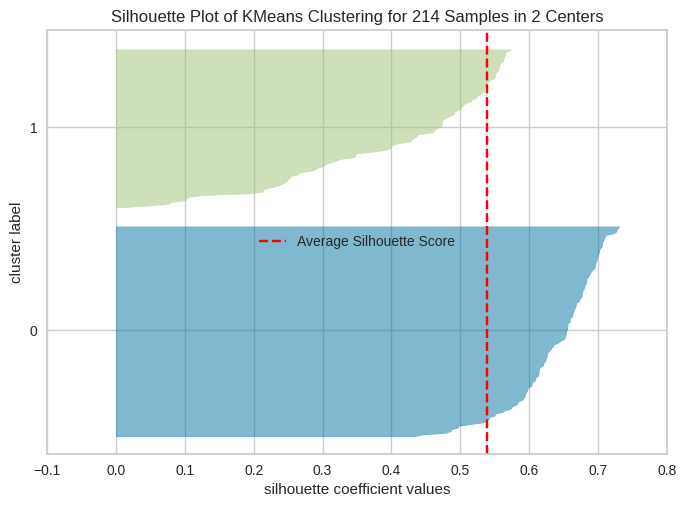

K=3: Iterations=4
K=3: Inertia=10.269
K=3: Cluster assignments for each record:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster centers (centroids):
['Temperature', 'Wind', 'CO']
[[0.52056632 0.23509485 0.03549457]
 [0.13489736 0.7793353  0.36058977]
 [0.35976155 0.24785254 0.84346417]]

Shape of data: (214, 3)
Number of dimensions: 3
K=3: Silhouette Score=0.624
----------------------------------------


/home/noahmac/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


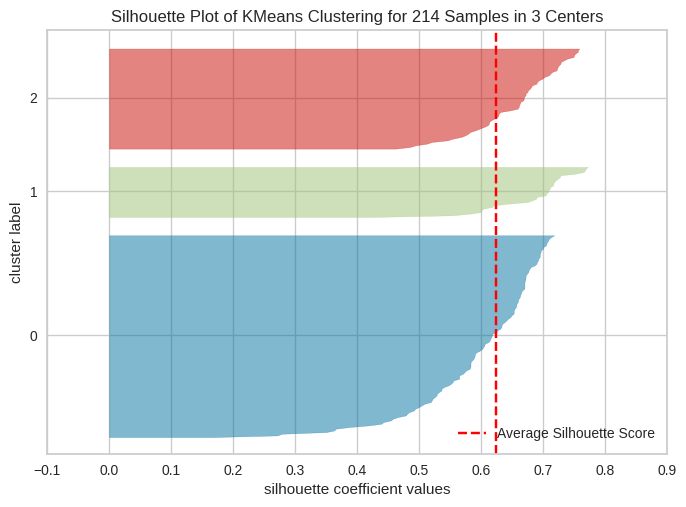

K=4: Iterations=7
K=4: Inertia=7.228
K=4: Cluster assignments for each record:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 0 3 3 3 3 3 3
 3 3 0 3 0 3 0 0 3 0 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 3 3 3 3
 3 0 0 3 0 3 0 0 0 3 3 0 0 0 0 0 0 3 0 0 0 0 3 3 3 3 0 0 0 3 0 0 0 0 0 3 3
 0 0 3 3 3 0 3 0 3 0 3 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster centers (centroids):
['Temperature', 'Wind', 'CO']
[[0.66979472 0.27809639 0.03703614]
 [0.13489736 0.7793353  0.36058977]
 [0.35976155 0.24785254 0.84346417]
 [0.36636364 0.19065994 0.03390161]]

Shape of data: (214, 3)
Number of dimensions: 3
K=4: Silhouette Score=0.499
----------------------------------------


/home/noahmac/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


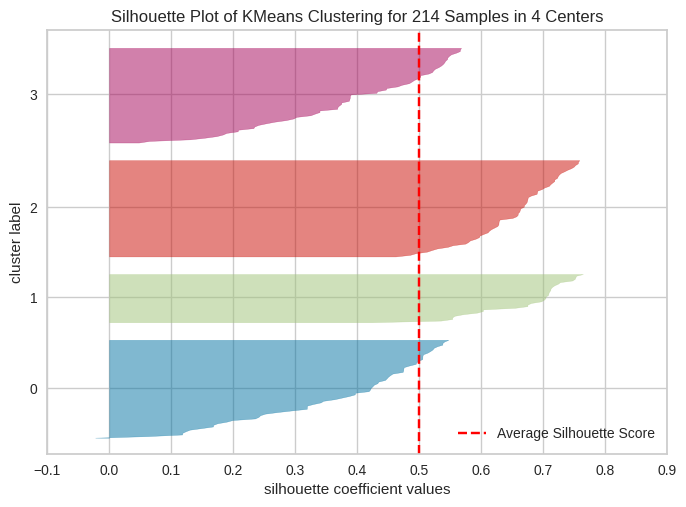

/home/noahmac/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


K=5: Iterations=10
K=5: Inertia=5.992
K=5: Cluster assignments for each record:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 0 4 0 0 4 4 0 4 4
 4 4 3 4 0 4 0 0 4 3 4 0 4 0 4 4 0 0 4 4 3 4 0 4 4 3 4 4 4 3 3 0 4 4 4 4 4
 3 0 0 4 3 4 0 3 0 4 4 3 3 3 0 3 0 4 3 3 0 3 4 4 4 4 3 3 3 4 0 3 3 0 3 4 4
 3 3 4 3 4 0 4 3 4 3 4 3 0 0 3 0 4 0 0 3 0 0 3 0 0 3 0 0 3 3 0 3 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster centers (centroids):
['Temperature', 'Wind', 'CO']
[[0.64593301 0.115389   0.03662065]
 [0.13489736 0.7793353  0.36058977]
 [0.35976155 0.24785254 0.84346417]
 [0.64       0.40155582 0.03614329]
 [0.3380334  0.20902728 0.03415791]]

Shape of data: (214, 3)
Number of dimensions: 3
K=5: Silhouette Score=0.498
----------------------------------------


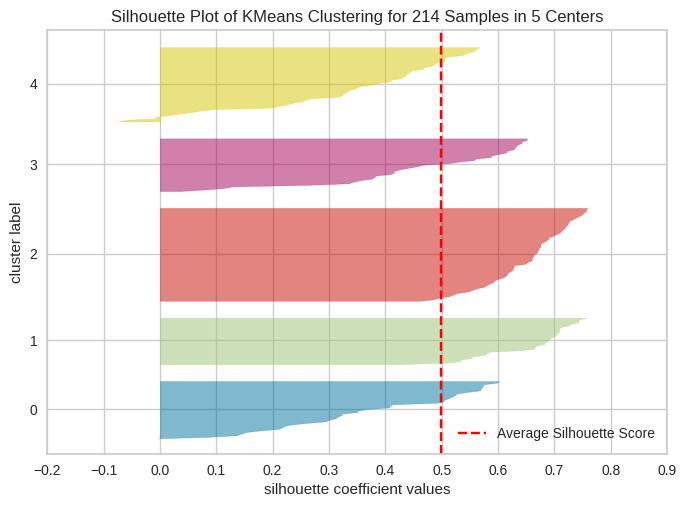

In [ ]:
# Imports K-means clustering algorithm from scikit-learn.
from sklearn.cluster import KMeans

# Imports the silhouette_score function from sklearn.metrics which is used 
# to evaluate the quality of clustering.
from sklearn.metrics import silhouette_score

# Imports the SilhouetteVisualizer to display the silhouette visualizer 
from yellowbrick.cluster import SilhouetteVisualizer

def print_kmeans_results(k, kmeans, visualizer):
    print(f"K={k}: Iterations = {kmeans.n_iter_}")
    print(f"K={k}: Inertia = {kmeans.inertia_:.3f}")
    print(f"\nK={k}: Cluster assignments for each record:")
    print(kmeans.labels_)
    print("Cluster centers (centroids):")
    print(pollution2_normalized.columns.tolist())
    print(kmeans.cluster_centers_)
    print("\nShape of data:", pollution2_normalized.shape)
    print("Number of dimensions:", pollution2_normalized.shape[1])
    print(f"K={k}: Silhouette Score={visualizer.silhouette_score_:.3f}")
    print("-" * 40)

for k in range(2,6):
    # Creates a kmeans object with specified parameters. 
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

    # Takes our normalized df and trains the df.
    kmeans.fit(pollution2_normalized)

    # Create visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(pollution2_normalized)

    print_kmeans_results(k, kmeans, visualizer)
    
    visualizer.show()


## Visualization of the silhouette values

Install Yellowbrick Package for visualized output: pip3 install yellowbrick